In [16]:
# packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Data_with_Coordinates_index.csv', index_col="id")

df.shape

(1092, 9)

In [11]:
df.head()

,Fournisseurs,n_facture,Montant,Date_de_facture,Date_echeance,n_sem,Mis_en_paie,EMAIL,id_fournisseurs
id,,,,,,,,,
1,Capsule Corp,115968610,74.00,2021-03-29,2021-04-12,15,2021-12-26 19:33:52,contact@capsule-corp.fr,1
2,Cyberdyne,21040827,1008.00,2021-04-09,2021-04-12,15,2021-12-26 19:34:04,contact@cyberdyne.fr,2
3,Geugène Industrie,2103006,2842.94,2021-03-15,2021-04-14,15,2021-12-26 19:34:05,contact@geugene.fr,3
4,Luthor Corp,F1920074,1325.00,2021-01-15,2021-04-15,15,2021-12-26 19:34:15,contact@luther.fr,4
5,Luthor Corp,F1920110,444.00,2021-01-15,2021-04-15,15,2021-12-26 19:34:16,contact@luther.fr,4


In [12]:
df.dtypes

Fournisseurs        object
n_facture           object
Montant            float64
Date_de_facture     object
Date_echeance       object
n_sem                int64
Mis_en_paie         object
EMAIL               object
id_fournisseurs      int64
dtype: object

In [13]:
df["Fournisseurs"].nunique()

46

In [14]:
df["Fournisseurs"].value_counts()[:5]

Luthor Corp            798
Sienar Technologies     69
Vladis Entreprise       29
Drake & Sweeney         20
Cordell SA              17
Name: Fournisseurs, dtype: int64

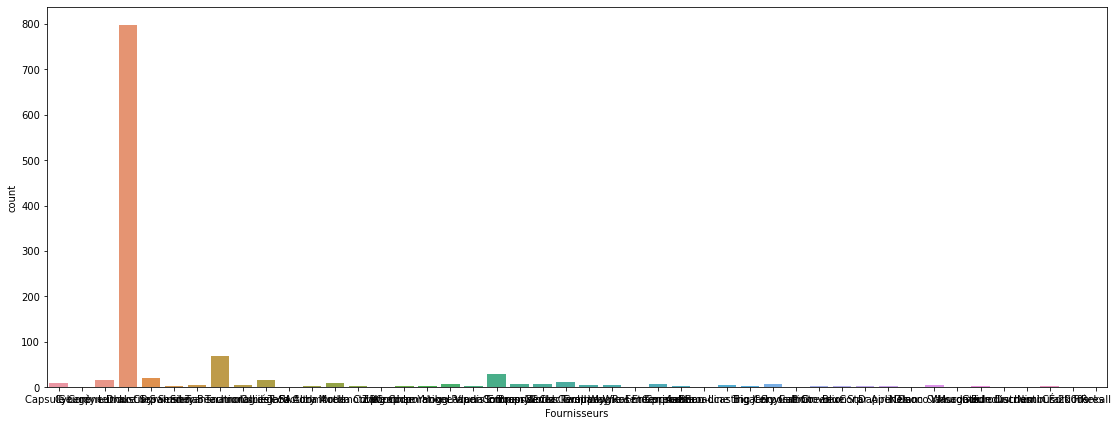

In [17]:
plt.figure(figsize = (19, 7))
sns.countplot(x = "Fournisseurs", data = df); 

In [33]:
t = pd.crosstab(df["Fournisseurs"], "freq", normalize=True)
t.head(7)

col_0,freq
Fournisseurs,
Aaltra,0.002747
Altra Automotive,0.009158
Beau-Line,0.000916
Beaumont-Liégard,0.003663
Big Jerry Cab Co,0.007326
Blue Star Airlines,0.002747
Bross & Clackwell,0.006410


In [34]:
t = t.assign(type = t.index, freq = 100 * t.freq).sort_values("freq", ascending=False)
t.head(7)

col_0,freq,type
Fournisseurs,,
Luthor Corp,73.076923,Luthor Corp
Sienar Technologies,6.318681,Sienar Technologies
Vladis Entreprise,2.655678,Vladis Entreprise
Drake & Sweeney,1.831502,Drake & Sweeney
Cordell SA,1.556777,Cordell SA
Geugène Industrie,1.373626,Geugène Industrie
World Company,1.007326,World Company


<AxesSubplot:xlabel='type', ylabel='freq'>

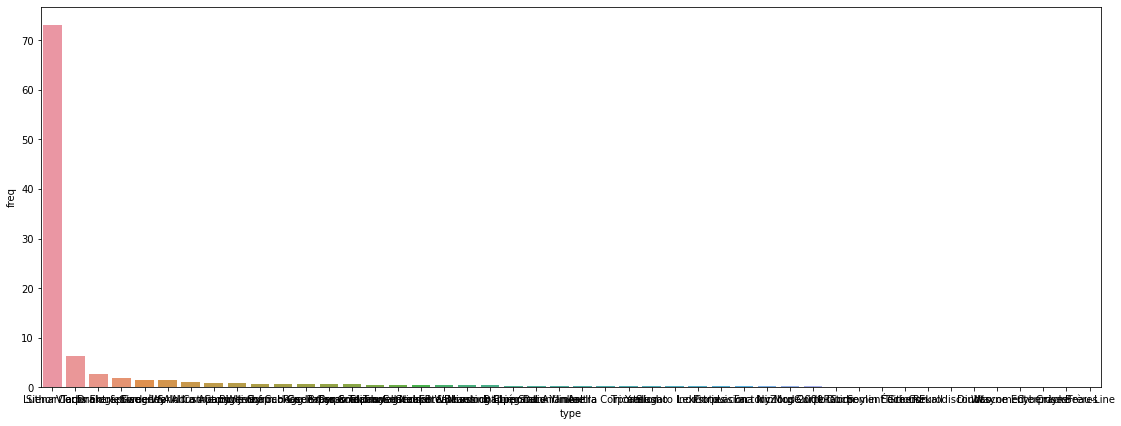

In [35]:
plt.figure(figsize = (19, 7))
sns.barplot(x = "type", y = "freq", data = t)

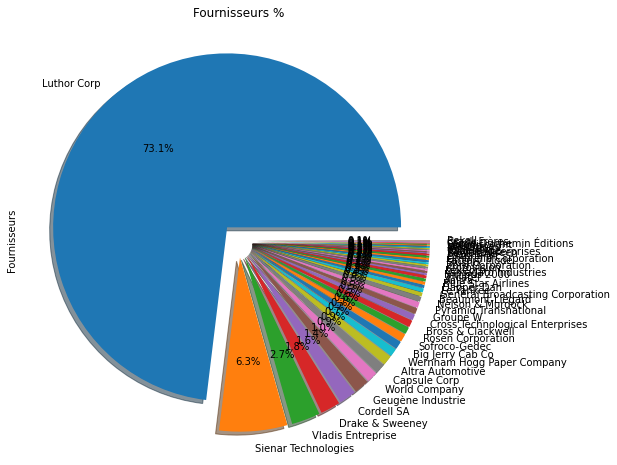

In [36]:
leng = df["Fournisseurs"].nunique()
ax=plt.subplots(1,1,figsize=(10,8))
df['Fournisseurs'].value_counts().plot.pie(explode=leng*[0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Fournisseurs %")
plt.show()

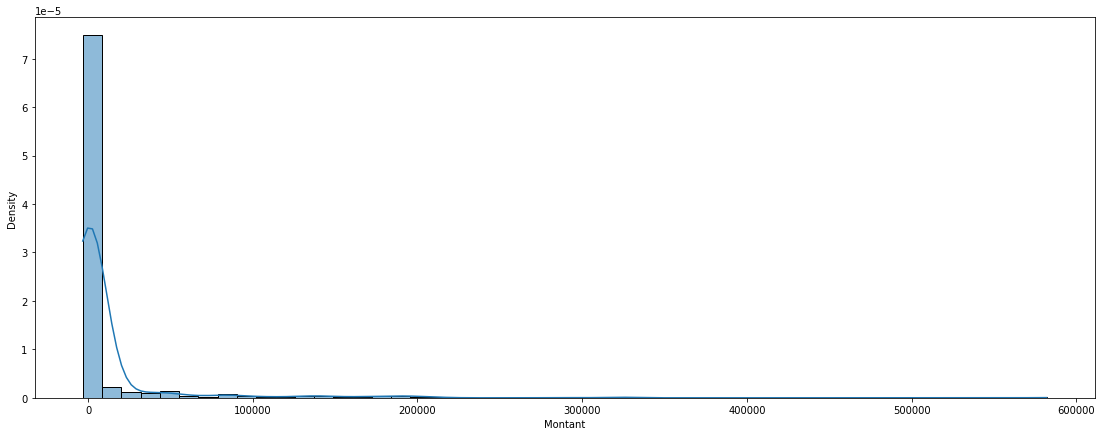

In [39]:
plt.figure(figsize = (19, 7))
sns.histplot(df.Montant, bins = 50, stat = "density", kde = True);

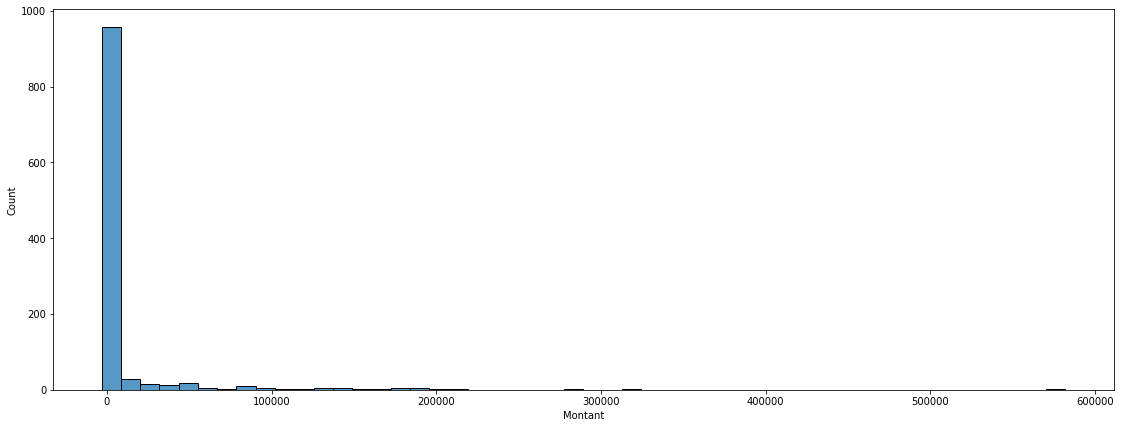

In [44]:
plt.figure(figsize = (19, 7))
sns.histplot(df.Montant, kde=False, bins= 50);

In [43]:
df["Montant"].max(), df["Montant"].min()

(581963.0, -3225.0)

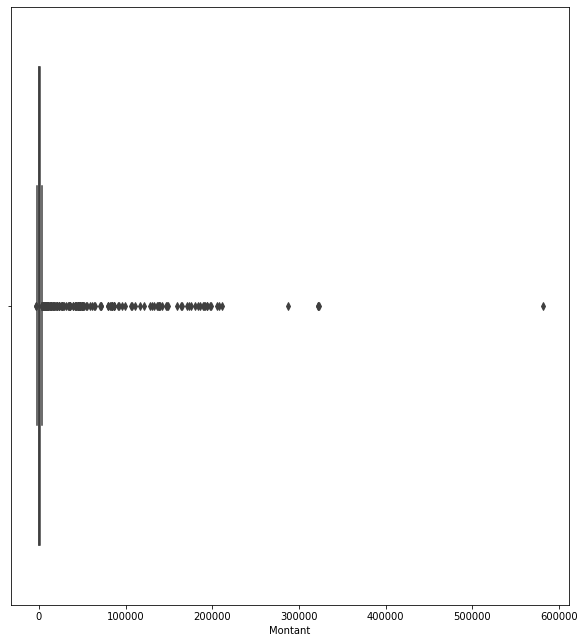

In [46]:
plt.figure(figsize = (10, 11))
sns.boxplot(x = "Montant", data = df);

In [49]:
housing = df[df["Montant"] < 150_000]
housing.shape # df.shape --> (1092, 9)

(1068, 9)

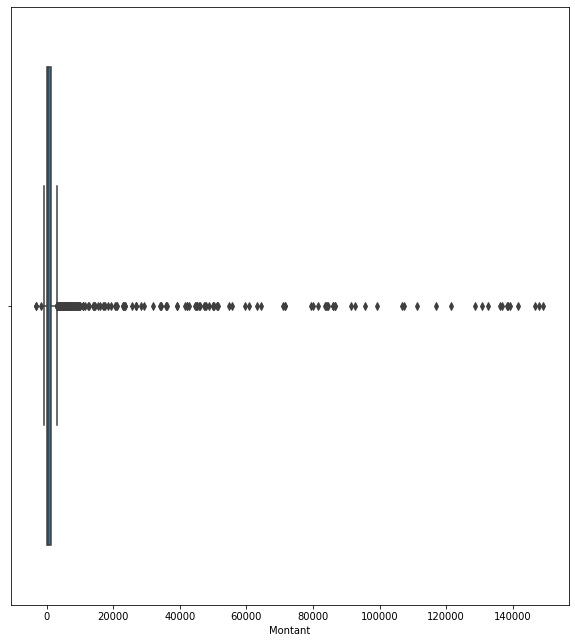

In [50]:
plt.figure(figsize = (10, 11))
sns.boxplot(x = "Montant", data = housing);

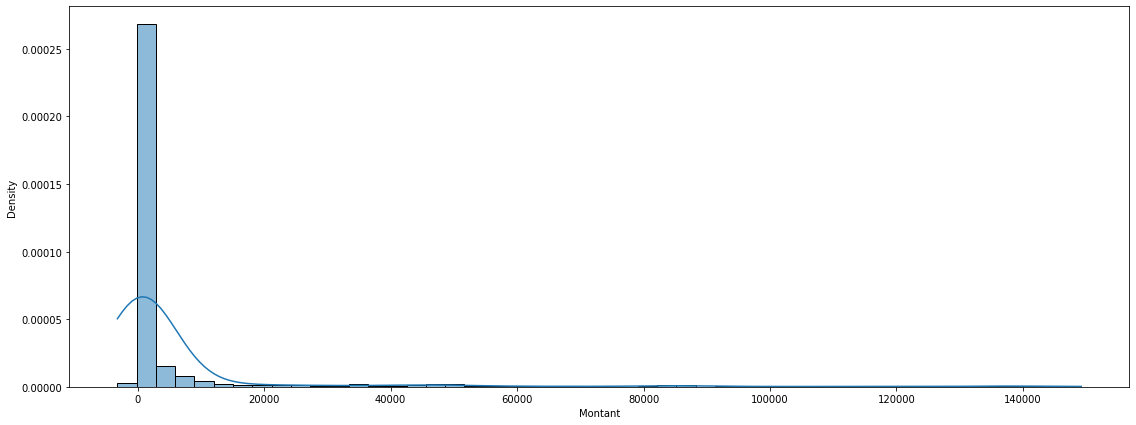

In [51]:
plt.figure(figsize = (19, 7))
sns.histplot(housing.Montant, bins = 50, stat = "density", kde = True);

In [52]:
# END